In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

## Load the Data

In [2]:
data = pd.read_csv('gas_turbines.csv')
data.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   

      NOX     TEY  
0  82.722  114.70  
1  82.776  114.72  
2  82.468  114.71  
3  82.670  114.72  
4  82.311  114.72

## EDA

In [3]:
data.shape

(15039, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

In [6]:
data[data.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, CDP, CO, NOX, TEY]
Index: []

In [7]:
# Correlation Matrix
data.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   

           CDP        CO       NOX       TEY  
AT   -0.100705 -0.088588 -0.600006 -0.207495  
AP    0.131198  0.041614  0.256744  0.146939  
AH   -0.182010  0.165505  0.143061 -0.110272  
AFDP  0.727152 -0.334207 -0.037299  0.717995  
GTEP  0.993784 -0.508259 -0.208496  0.977042  
TIT   0.887238 -0.688272 -0.231636  0.891587  
TAT  -0.744740  0.063404  0.009888 -0.720356  
CDP   1.000000 -0.520783 -0.169103  0.988473  
CO   -0.520783  1.000000  0.316743 -0.541751  
NOX  -0.169103  0.316743  1.000000 -0.102631  
TEY   0.988473 -0.541751 -0.102631  1.000000

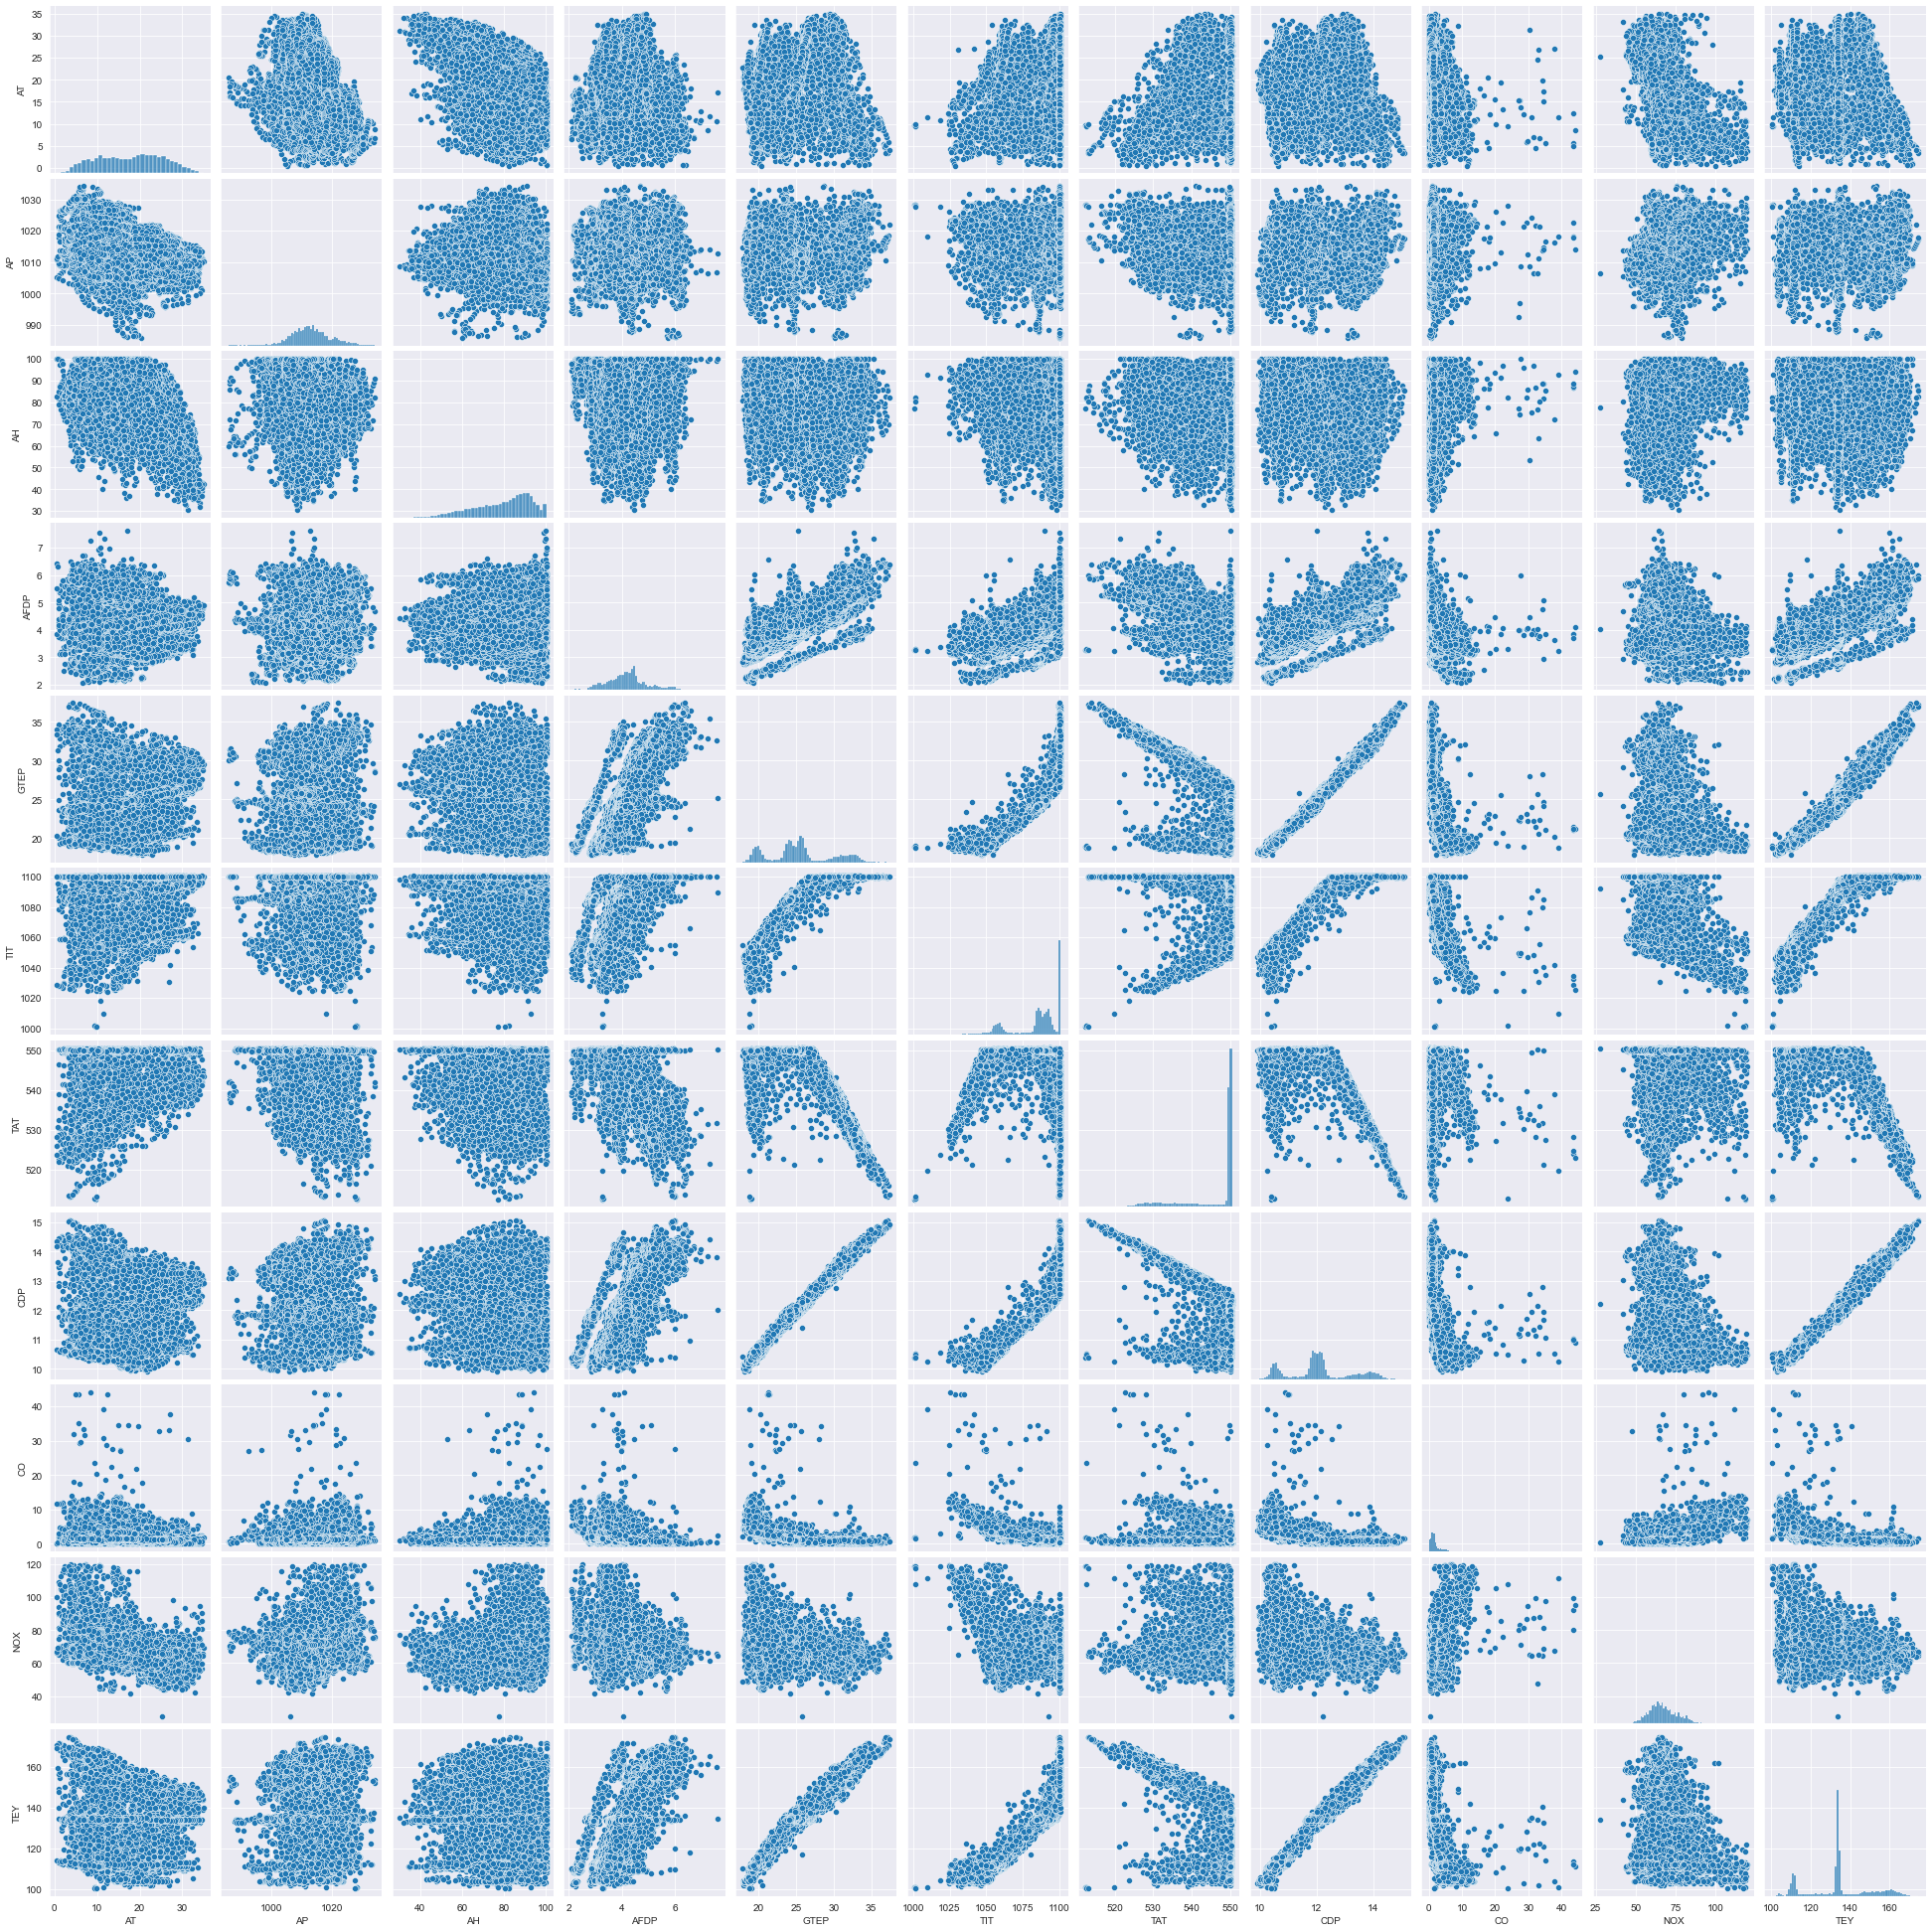

In [8]:
# Pair plot
sns.set_style(style = 'darkgrid')
sns.pairplot(data)

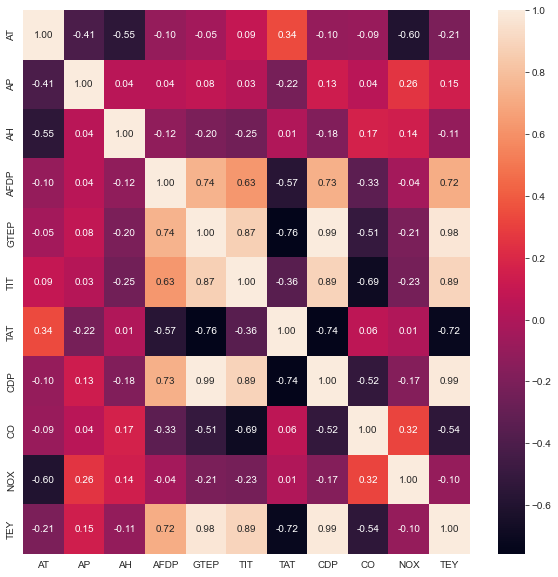

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [10]:
data.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           CDP            CO           NOX  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183     12.102353      1.972499     68.190934   
std       16.527806      7.866803      1.103196      2.222206     10.470586   
min     1000.800000    512.450000      9.904400      0.000388     27.765000   
25%     1079.600000    542.170000     11.622000      0.858055     61.303500   
50%     1088.700000    549.890000     12.025000      1.390200     66.601000   
75%     1096.000000    550.060000     12.578000      2.160400     73.935500   
max     1100.800000    550.610000     15.081000     44.103000    119.890000   

                TEY  
count  15039.000000  
mean     134.188464  
std       15.829717  
min      100.170000  
25%      127.985000  
50%      133.780000  
75%      140.895000  
max      174.610000

In [11]:
data_summary = data.agg(['skew', 'kurtosis']).transpose()
data_summary

skew   kurtosis
AT   -0.030710  -0.987597
AP    0.107601   0.424070
AH   -0.681224  -0.282476
AFDP  0.315150   0.281642
GTEP  0.370987  -0.618358
TIT  -1.133744   0.375232
TAT  -1.485524   0.847637
CDP   0.263042  -0.589420
CO    6.534577  82.518116
NOX   1.126605   2.660381
TEY   0.145963  -0.487058

### Data Transformation

In [12]:
data.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   

      NOX     TEY  
0  82.722  114.70  
1  82.776  114.72  
2  82.468  114.71  
3  82.670  114.72  
4  82.311  114.72

In [13]:
data1 = data.iloc[:,:-1]
data1.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   

      NOX  
0  82.722  
1  82.776  
2  82.468  
3  82.670  
4  82.311

In [14]:
#function to return plots for the feature
def normality(data,features):
    for i in range(len(features)):
        plt.figure(figsize=(20,10))
        plt.subplot(i+1,2,1)
        sns.kdeplot(data[features[i]])
        plt.subplot(i+1,2,2)
        stats.probplot(data[features[i]],plot=pylab)
        plt.show()

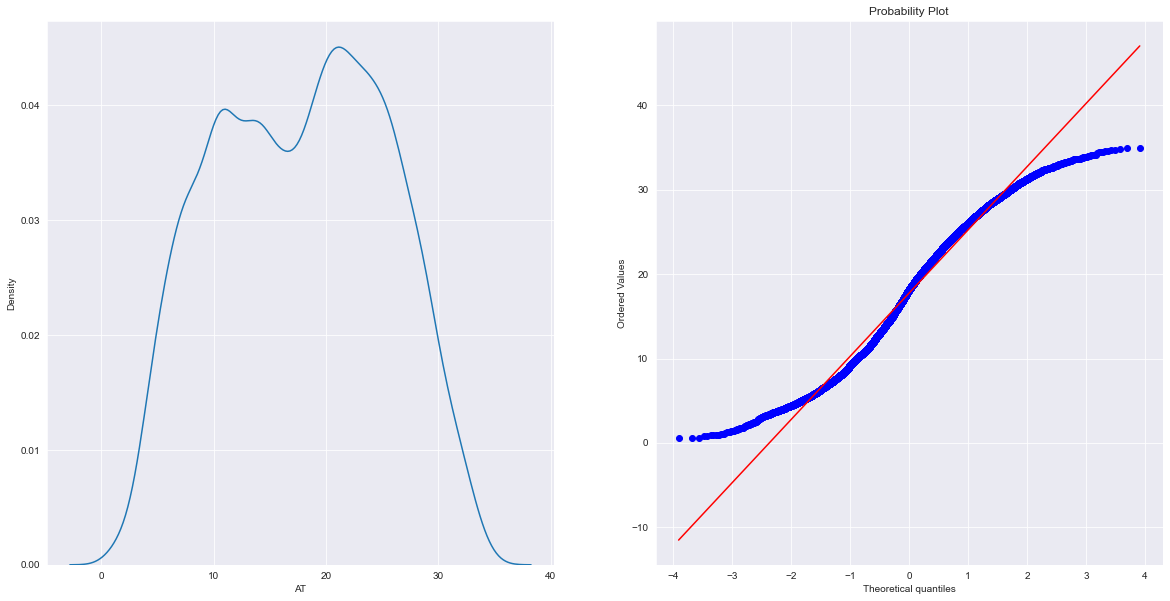

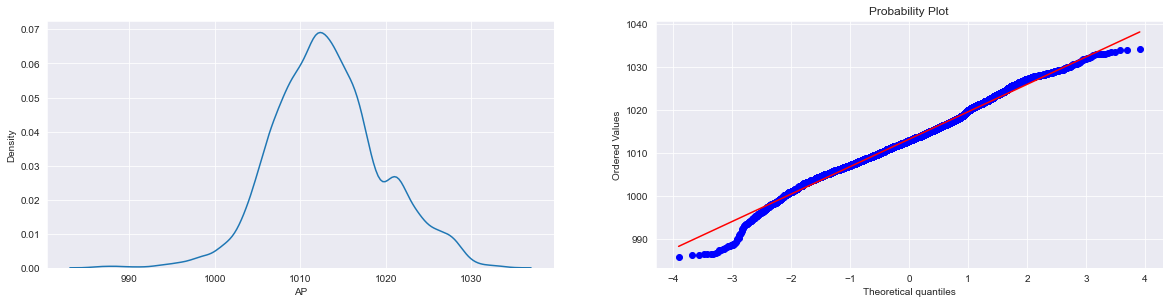

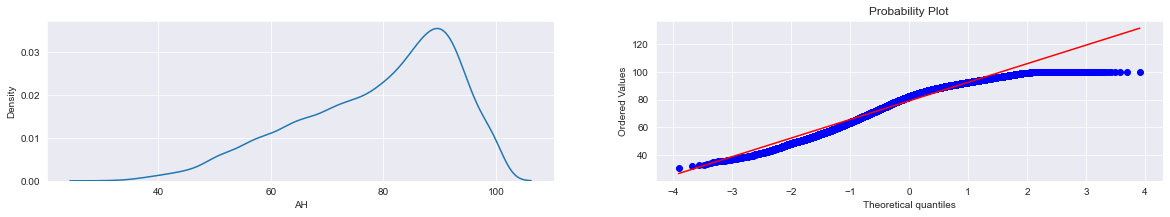

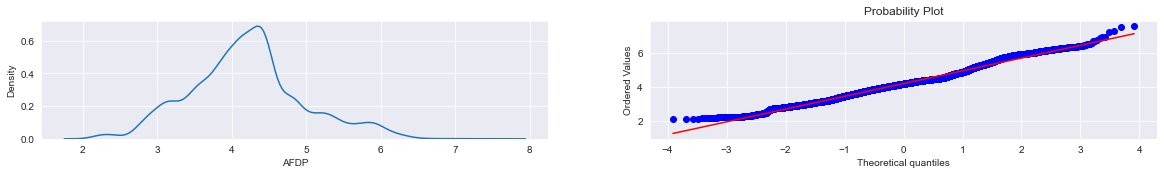

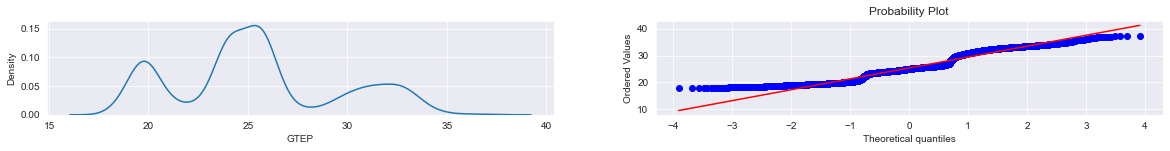

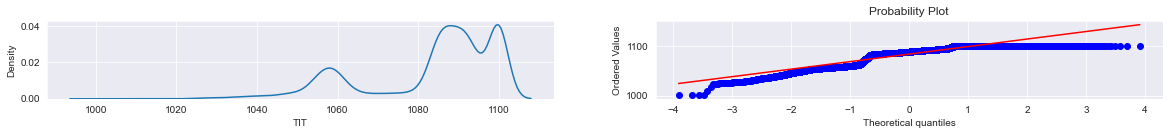

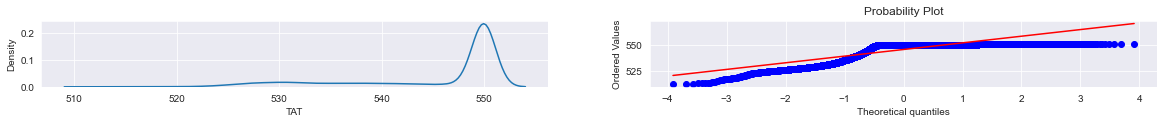

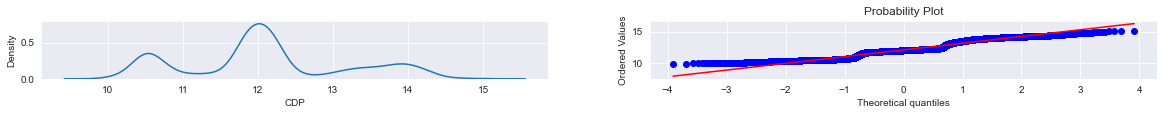

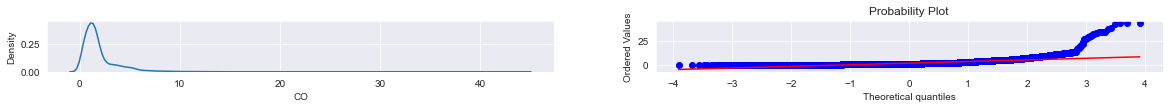

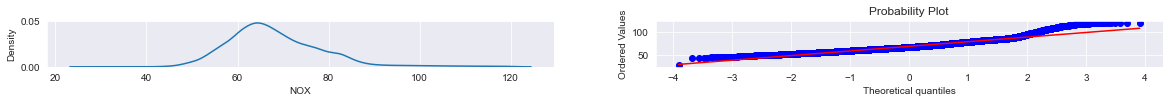

In [15]:
features = list(data1.columns)
normality(data,features)

In [16]:
#Data Transformation i.e. Normalize the data set
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0.1 , 1.1))
minmax = minmax.fit_transform(data1)
data_norm = pd.DataFrame(data = minmax , columns = data1.columns)
data_norm.head()

AT        AP        AH      AFDP      GTEP    TIT       TAT  \
0  0.284182  0.556050  1.051314  0.355758  0.191426  0.684  1.084015   
1  0.282020  0.566391  1.055881  0.355721  0.194755  0.685  1.084015   
2  0.285295  0.574664  1.039003  0.352571  0.197367  0.686  1.080608   
3  0.289922  0.582937  1.029126  0.352227  0.198033  0.688  1.083753   
4  0.299830  0.593278  1.027708  0.355323  0.196650  0.689  1.083491   

        CDP        CO       NOX  
0  0.235340  0.171522  0.696548  
1  0.233988  0.173372  0.697134  
2  0.234567  0.172576  0.693791  
3  0.235533  0.172375  0.695984  
4  0.236692  0.173647  0.692087

In [17]:
data_summary = data1.agg(['skew', 'kurtosis']).transpose()
data_summary

skew   kurtosis
AT   -0.030710  -0.987597
AP    0.107601   0.424070
AH   -0.681224  -0.282476
AFDP  0.315150   0.281642
GTEP  0.370987  -0.618358
TIT  -1.133744   0.375232
TAT  -1.485524   0.847637
CDP   0.263042  -0.589420
CO    6.534577  82.518116
NOX   1.126605   2.660381

In [18]:
data_norm_summary = data_norm.agg(['skew', 'kurtosis']).transpose()
data_norm_summary

skew   kurtosis
AT   -0.030710  -0.987597
AP    0.107601   0.424070
AH   -0.681224  -0.282476
AFDP  0.315150   0.281642
GTEP  0.370987  -0.618358
TIT  -1.133744   0.375232
TAT  -1.485524   0.847637
CDP   0.263042  -0.589420
CO    6.534577  82.518116
NOX   1.126605   2.660381

In [19]:
# Box-Cox Transformation
data_boxcox = pd.DataFrame()
from scipy.stats import boxcox

for i in range(data_norm.shape[1]):
    fitted_data, fitted_lambda = boxcox(data_norm.iloc[:,i])
    data_boxcox[features[i]] = fitted_data

data_boxcox.head()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0 -0.771736 -0.452296  0.052610 -0.735535 -1.110847 -0.195608  0.100956   
1 -0.774341 -0.441528  0.057418 -0.735584 -1.103488 -0.195286  0.100956   
2 -0.770396 -0.432923  0.039752 -0.739885 -1.097756 -0.194962  0.096144   
3 -0.764834 -0.424327  0.029543 -0.740355 -1.096301 -0.194311  0.100584   
4 -0.752969 -0.413594  0.028086 -0.736128 -1.099326 -0.193983  0.100212   

        CDP         CO       NOX  
0 -0.951450 -29.221672 -0.383589  
1 -0.953775 -28.460718 -0.382644  
2 -0.952778 -28.784617 -0.388050  
3 -0.951119 -28.867561 -0.384501  
4 -0.949131 -28.350236 -0.390819

In [20]:
data_boxcox_summary = data_boxcox.agg(['skew', 'kurtosis']).transpose()
data_boxcox_summary

skew  kurtosis
AT   -0.121385 -0.958864
AP    0.050217  0.499335
AH   -0.219724 -0.935546
AFDP  0.018481  0.257457
GTEP -0.062991 -0.686824
TIT  -0.390174 -0.984259
TAT  -1.000831 -0.847429
CDP  -0.067255 -0.623087
CO    0.153245 -0.497680
NOX  -0.024196  1.340154

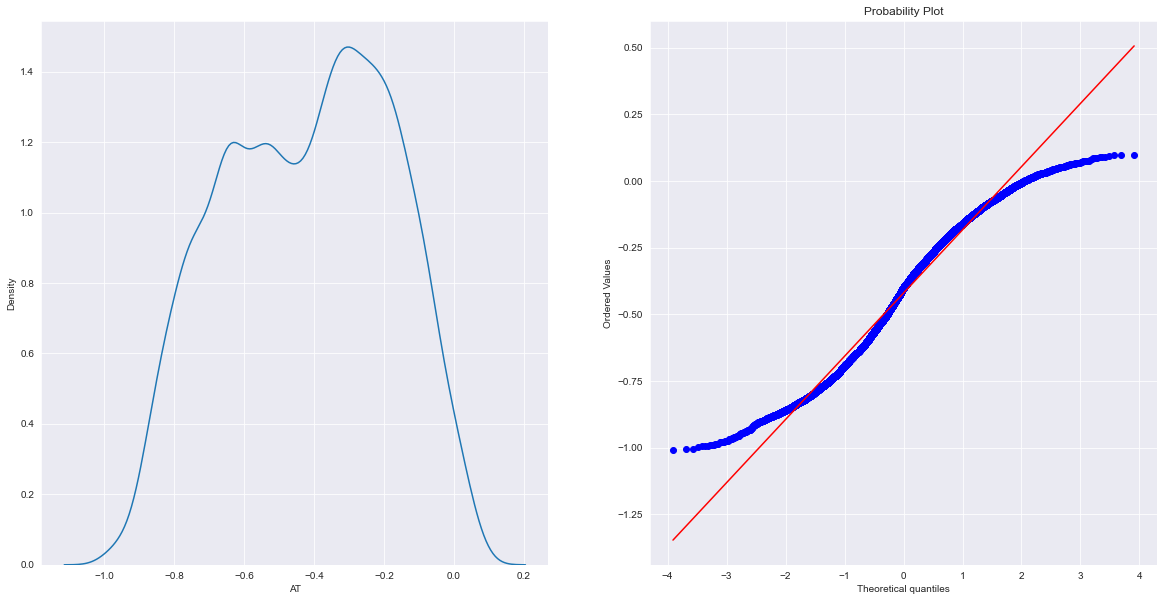

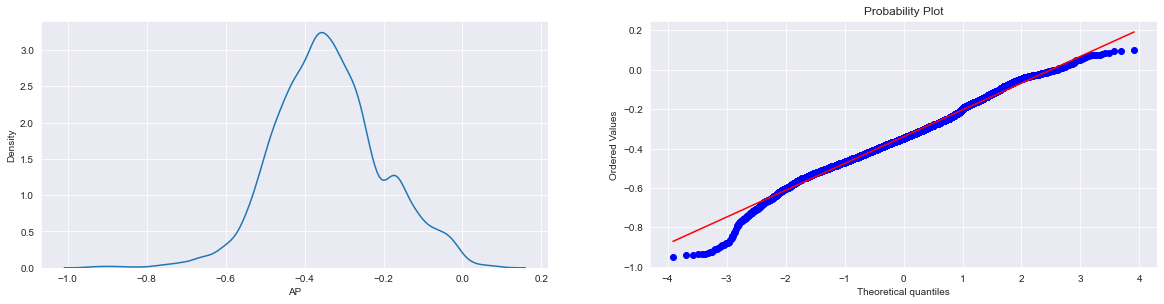

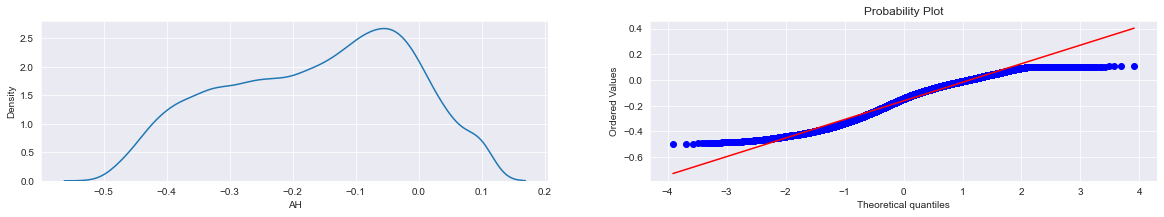

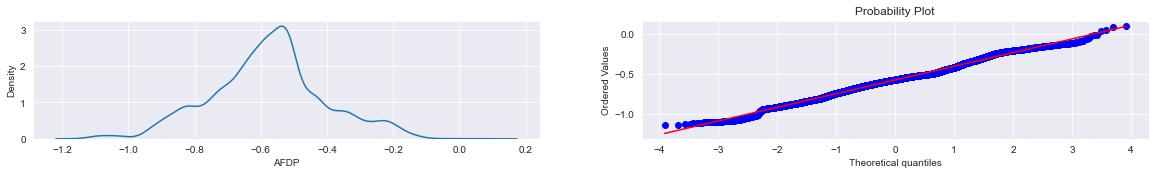

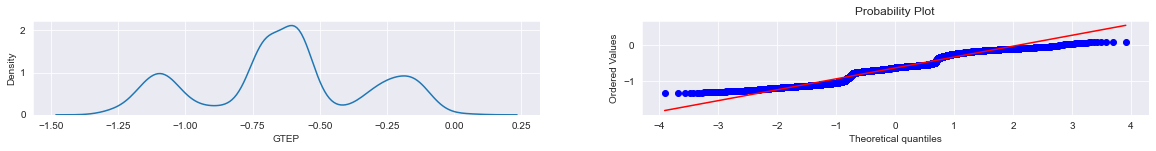

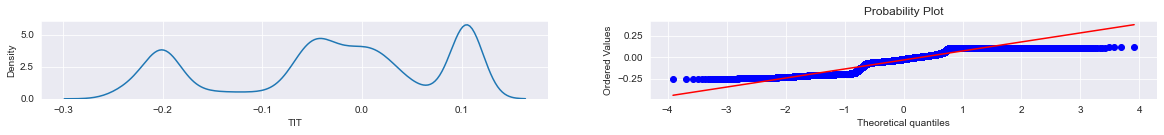

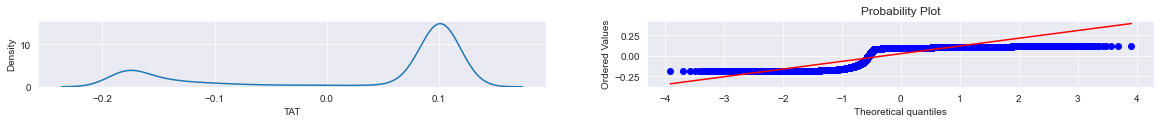

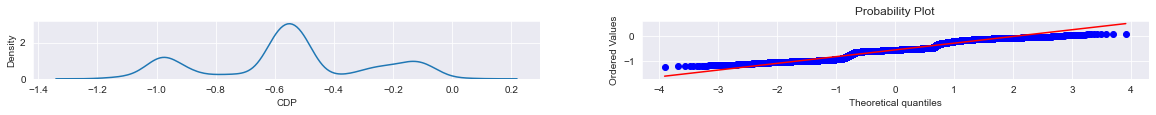

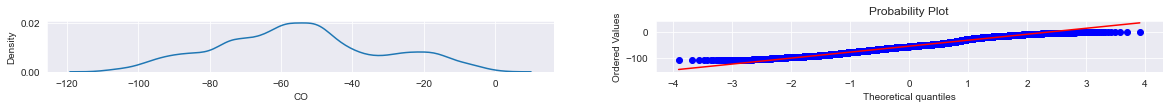

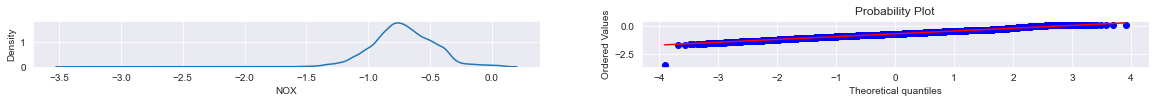

In [21]:
features = list(data1.columns)
normality(data_boxcox,features)

In [22]:
# log Transformation
data_log = pd.DataFrame()

for i in range(data_norm.shape[1]):
    fitted_data= np.log(data_norm.iloc[:,i])
    data_log[features[i]] = fitted_data
    
    
data_log.head()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0 -1.258140 -0.586898  0.050041 -1.033506 -1.653254 -0.379797  0.080671   
1 -1.265778 -0.568471  0.054375 -1.033608 -1.636012 -0.378336  0.080671   
2 -1.254230 -0.553970  0.038262 -1.042503 -1.622689 -0.376878  0.077524   
3 -1.238142 -0.539676  0.028710 -1.043480 -1.619321 -0.373966  0.080430   
4 -1.204539 -0.522092  0.027331 -1.034728 -1.626328 -0.372514  0.080188   

        CDP        CO       NOX  
0 -1.446725 -1.763043 -0.361618  
1 -1.452487 -1.752314 -0.360777  
2 -1.450014 -1.756915 -0.365584  
3 -1.445904 -1.758085 -0.362429  
4 -1.440995 -1.750732 -0.368044

In [23]:
data_log_summary = data_log.agg(['skew', 'kurtosis']).transpose()
data_log_summary

skew  kurtosis
AT   -0.744662 -0.064864
AP   -1.164348  5.999536
AH   -1.445165  2.479714
AFDP -0.806248  1.617508
GTEP -0.557040 -0.407573
TIT  -1.753373  4.921122
TAT  -2.035437  4.711088
CDP  -0.640278 -0.283782
CO    2.019093  7.121220
NOX   0.264539  0.884473

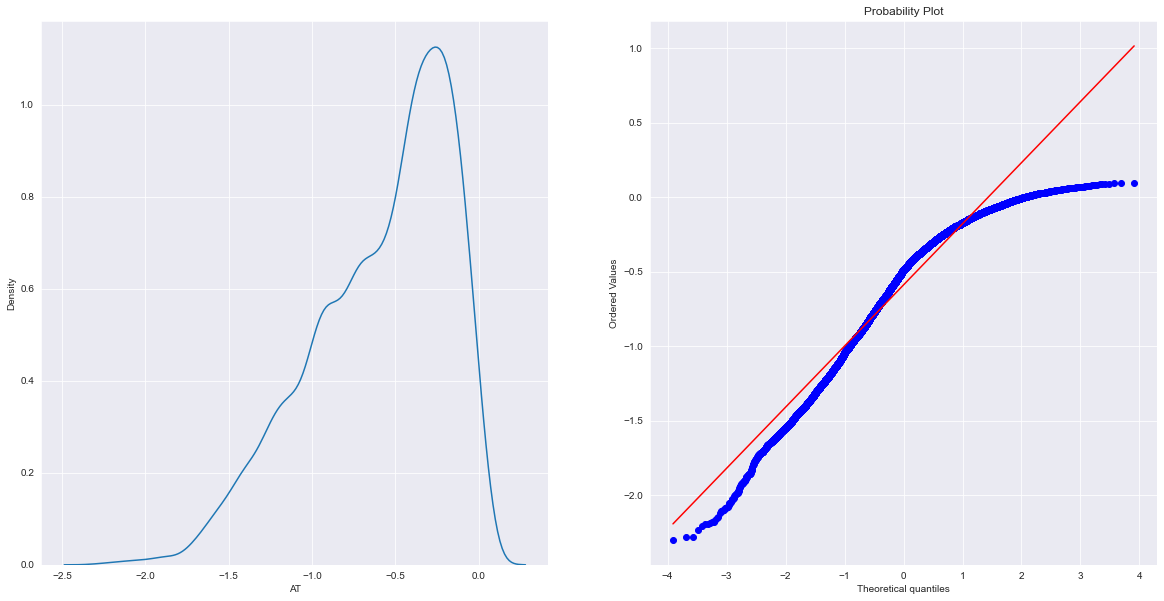

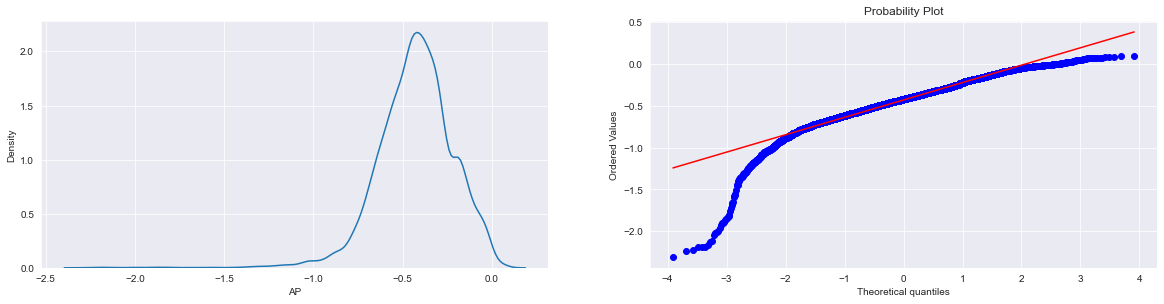

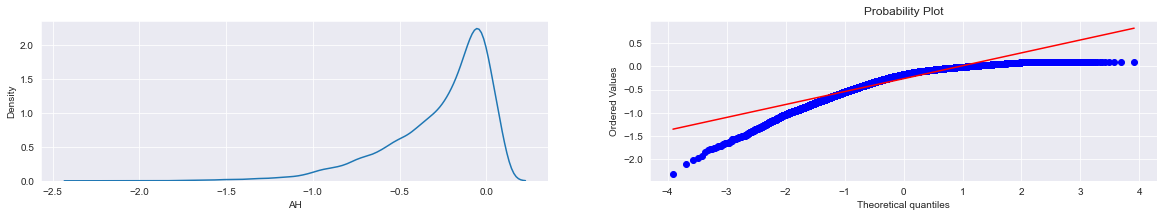

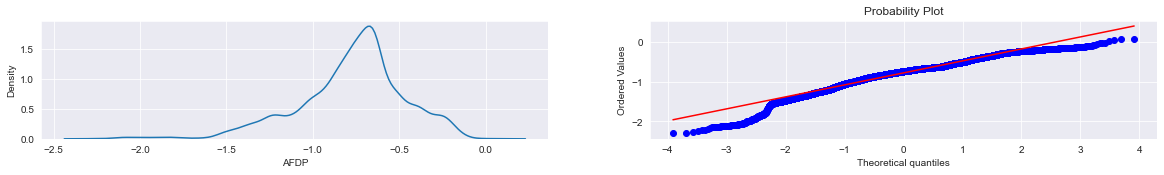

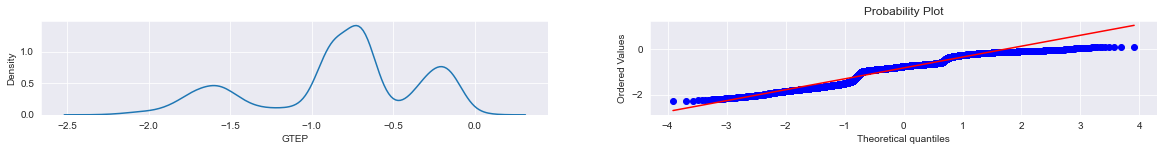

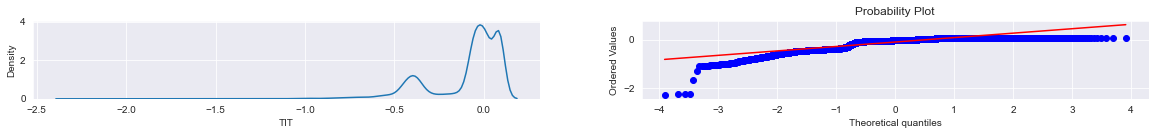

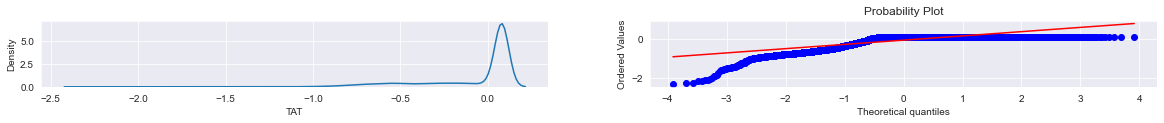

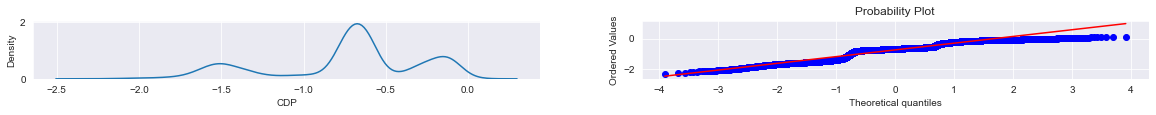

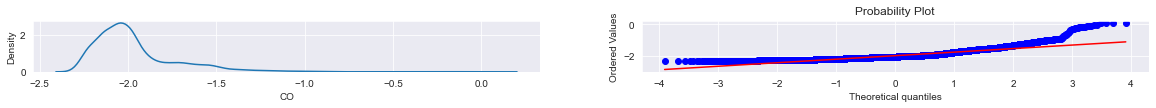

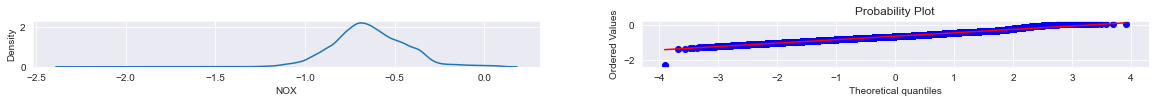

In [24]:
features = list(data1.columns)
normality(data_log,features)

In [25]:
final_data = data_boxcox.copy()
final_data['TEY'] = data['TEY']
final_data.head()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0 -0.771736 -0.452296  0.052610 -0.735535 -1.110847 -0.195608  0.100956   
1 -0.774341 -0.441528  0.057418 -0.735584 -1.103488 -0.195286  0.100956   
2 -0.770396 -0.432923  0.039752 -0.739885 -1.097756 -0.194962  0.096144   
3 -0.764834 -0.424327  0.029543 -0.740355 -1.096301 -0.194311  0.100584   
4 -0.752969 -0.413594  0.028086 -0.736128 -1.099326 -0.193983  0.100212   

        CDP         CO       NOX     TEY  
0 -0.951450 -29.221672 -0.383589  114.70  
1 -0.953775 -28.460718 -0.382644  114.72  
2 -0.952778 -28.784617 -0.388050  114.71  
3 -0.951119 -28.867561 -0.384501  114.72  
4 -0.949131 -28.350236 -0.390819  114.72

In [26]:
final_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

### Feature Engineering

In [27]:
from sklearn.feature_selection import  RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [28]:
# Spliting into X and y
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]

In [29]:
#Feature Extraction 
feature_model = LinearRegression()
rfe = RFE(feature_model , n_features_to_select=4)
fit = rfe.fit(X,y)

In [30]:
fit.ranking_

array([1, 4, 5, 6, 1, 1, 2, 1, 7, 3])

In [31]:
#Feature Extraction 
feature_model = DecisionTreeRegressor()
feature_model.fit(X,y)

DecisionTreeRegressor()

In [32]:
np.set_printoptions(precision=3)
print(feature_model.feature_importances_)

[7.096e-03 3.226e-04 1.864e-04 2.903e-04 3.016e-03 8.736e-03 6.745e-03
 9.730e-01 3.535e-04 3.028e-04]


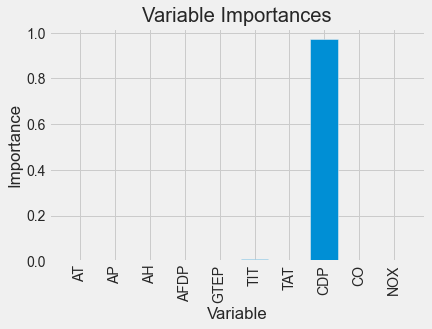

In [33]:
# Set the style
plt.style.use('fivethirtyeight')

importances = feature_model.feature_importances_
feature_list = list(X.columns)

# list of x locations for plotting
X_values = list(range(len(importances)))
# Make a bar chart
plt.bar(X_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(X_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Ploting data in 2D using t-SNE

In [34]:
from sklearn.manifold import TSNE

In [35]:
# Spliting into X and y
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]

In [36]:
data_tsne = TSNE(n_components = 2).fit_transform(X)
data_tsne = pd.DataFrame(data_tsne , columns =['tsne1','tsne2'])
data_tsne['y'] = y
data_tsne

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


tsne1      tsne2       y
0      25.662277   7.464340  114.70
1      28.709963   5.741836  114.72
2      26.731964   6.574685  114.71
3      26.481203   6.762208  114.72
4      28.819862   5.654145  114.72
...          ...        ...     ...
15034   3.429662 -19.005787  111.61
15035 -15.377394  28.604990  111.78
15036 -54.002304  73.934555  110.19
15037 -63.764744  51.473785  110.74
15038 -31.944851  30.537479  111.58

[15039 rows x 3 columns]

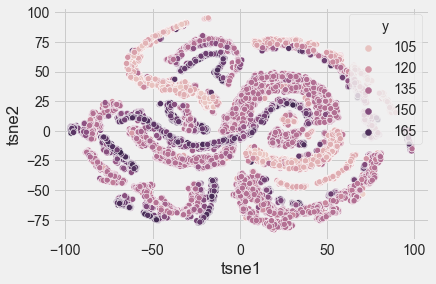

In [37]:
sns.scatterplot(x='tsne1', y='tsne2', data=data_tsne , hue = data_tsne.y)
plt.show()

## Model Building